<a href="https://colab.research.google.com/github/rajavarshinic/Tree_Species_Classification/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tree_Species_Dataset.zip to Tree_Species_Dataset.zip


In [ ]:
import zipfile
import os

# Unzip the uploaded file into 'tree_data' folder
with zipfile.ZipFile("Tree_Species_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/tree_data")

# Confirm path
dataset_path = "/content/tree_data/Tree_Species_Dataset"
print("Unzipped at:", dataset_path)


Unzipped at: /content/tree_data/Tree_Species_Dataset


In [ ]:
import os

# List subdirectories (tree species)
species_dirs = os.listdir(dataset_path)
species_dirs = [d for d in species_dirs if os.path.isdir(os.path.join(dataset_path, d))]
print("Tree Species Classes:", species_dirs)
print("Total classes:", len(species_dirs))


Tree Species Classes: ['.git', 'other', 'garmalo', 'bamboo', 'neem', 'nilgiri', 'sugarcane', 'gulmohor', 'gunda', 'bili', 'khajur', 'jamun', 'champa', 'amla', 'pipal', 'mango', 'coconut', 'pilikaren', 'kesudo', 'banyan', 'cactus', 'kanchan', 'shirish', 'simlo', 'asopalav', 'vad', 'saptaparni', 'babul', 'sitafal', 'sonmahor', 'motichanoti']
Total classes: 31


In [2]:
extract_path = os.path.join(extract_path, 'Tree_Species_Dataset')

NameError: name 'os' is not defined

Top-level directory inside tree_data: ['Tree_Species_Dataset']
Tree Species Classes: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']
Total classes: 31


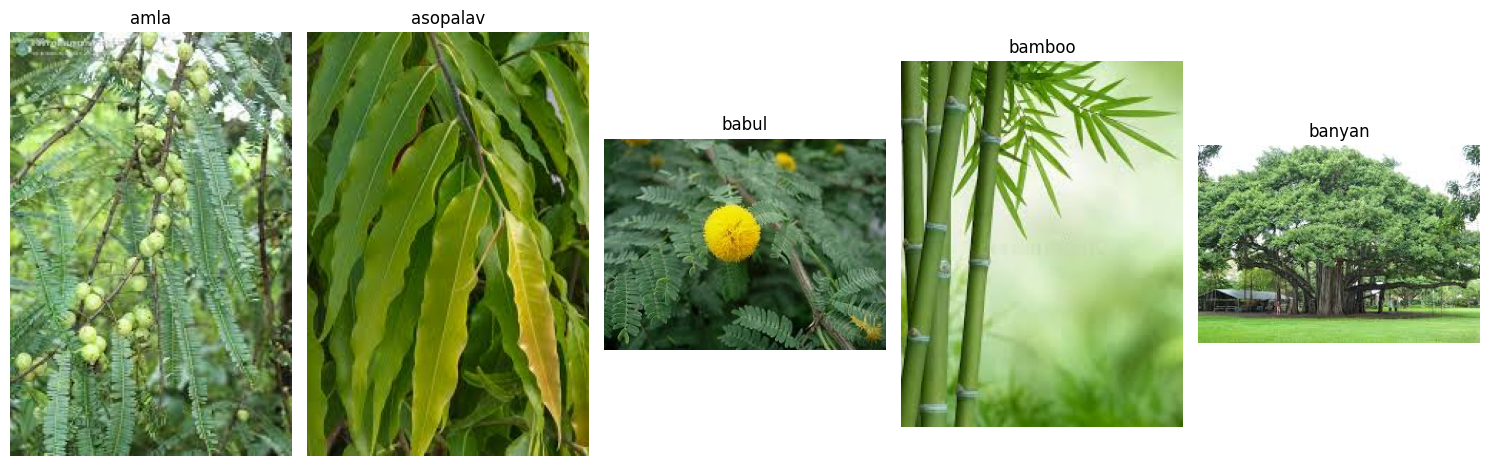

In [4]:
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Define your paths
zip_file = "/content/Tree_Species_Dataset.zip"
extract_path = "/content/tree_data"

# Step 2: Unzip the dataset
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



# Step 3: Fix the path if nested inside one folder
# Let's check what folder was created inside 'tree_data'
top_dirs = os.listdir(extract_path)
print("Top-level directory inside tree_data:", top_dirs)

# If it's only one folder (like Tree_Species_Dataset), go inside it
if len(top_dirs) == 1:
    extract_path = os.path.join(extract_path, top_dirs[0])

# Step 4: List species folders
species_dirs = sorted(os.listdir(extract_path))
print("Tree Species Classes:", species_dirs)
print("Total classes:", len(species_dirs))

# Step 5: Display 5 sample images with labels
fig = plt.figure(figsize=(15, 5))
i = 1
for species in species_dirs:
    species_path = os.path.join(extract_path, species)
    if os.path.isdir(species_path):
        image_files = [f for f in os.listdir(species_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if image_files:
            img_path = os.path.join(species_path, image_files[0])
            img = mpimg.imread(img_path)
            ax = fig.add_subplot(1, 5, i)
            ax.imshow(img)
            ax.set_title(species)
            ax.axis('off')
            i += 1
        if i > 5:
            break
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set path to dataset
dataset_path = "/content/tree_data"  # Update if your path differs

# Set image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Split the dataset (train/validation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get number of classes
num_classes = len(train_generator.class_indices)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use dynamic class count
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          validation_data=val_generator,
          epochs=25)

# Save the model
model.save("tree_species_cnn_model.h5")


Found 1280 images belonging to 1 classes.
Found 320 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accu